# Data import and visualization using Python
- focus: using Python to import and visualize data
- examine data in a variety of formats
- manipulating different data types

End of Day 2:  
- nuances and issues in importing data  
- cleaning and shaping data  
- basic summaries  
- statistical analysis in Python and R

Python modules for importing, visualizing and analyzing datasets:
- `pandas`
- `Matplotlib`
- `Seaborn`
- `NumPy`
- `SciPy`
- `Statsmodels`
- `scikit-learn`

## Importing data using pandas
- data will likely be tabular
- sources:  
    - delimited file  
    - URL  
    - database (query or internal)
- issues: proper formatting (consistent delimiters/spacing)
- likely use the `pandas` module to import data
- data stored in structure called a `DataFrame`
 
- main functions:
    - `read_csv`: comma is the default delimiter
    - `read_table`: more general function; `\t` is the default delimiter
    - `read_fwf`: read fixed-width files  z

## Example 1: 2010 US Census population density data (CSV)
- specify URL  
- call `read_csv` function  
- examine first six rows via `head` function

In [2]:
density_data_2010.head()

,# POPULATION DENSITY DATA PROVIDED BY U.S. CENSUS.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,# DENSITY EXPRESSED AS PEOPLE PER SQUARE MILE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# DENSITY RANKING EXPRESSED IN ORDER OF MOST D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
3,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29


Do we really want the data in this format? We likely want the row with the index of **`2`** to be the header of our `DataFrame`. Let's reimport the data, using some of `read_csv`'s additional arguments.

In [3]:
density_url = 'http://www.census.gov/2010census/csv/pop_density.csv'

density_data_2010 = pd.read_csv(density_url, skiprows = [0, 1, 2])

density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29
2,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,52,52
3,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49,47,47,47,43,43,42,39,38,35
4,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31,32,32,34,36,37,37,37,36,36


## Accessing information about data
- `shape` function: rows, columns  
- access column values and place into a Python list  
- examine the index  
- access specific column values

In [4]:
density_data_dimen = density_data_2010.shape
density_data_cols = density_data_2010.columns.values.tolist()
density_data_idx = density_data_2010.index
pop_1910 = density_data_2010['1910_POPULATION'].values

print 'Data dimensions: %d rows, %d columns' % (density_data_dimen[0], density_data_dimen[1])
print 'First 10 indices of population density DataFrame: ', density_data_idx[:10]
print 'Names of DataFrame columns:'
print 'Name: index'
for position, name in enumerate(density_data_cols):
    print name, ':', position

Data dimensions: 53 rows, 34 columns
First 10 indices of population density DataFrame:  Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Names of DataFrame columns:
Name: index
STATE_OR_REGION : 0
1910_POPULATION : 1
1920_POPULATION : 2
1930_POPULATION : 3
1940_POPULATION : 4
1950_POPULATION : 5
1960_POPULATION : 6
1970_POPULATION : 7
1980_POPULATION : 8
1990_POPULATION : 9
2000_POPULATION : 10
2010_POPULATION : 11
1910_DENSITY : 12
1920_DENSITY : 13
1930_DENSITY : 14
1940_DENSITY : 15
1950_DENSITY : 16
1960_DENSITY : 17
1970_DENSITY : 18
1980_DENSITY : 19
1990_DENSITY : 20
2000_DENSITY : 21
2010_DENSITY : 22
1910_RANK : 23
1920_RANK : 24
1930_RANK : 25
1940_RANK : 26
1950_RANK : 27
1960_RANK : 28
1970_RANK : 29
1980_RANK : 30
1990_RANK : 31
2000_RANK : 32
2010_RANK : 33


In [5]:
print 'Population values in 1910 (first 10 entries):'
pop_1910[:10]

Population values in 1910 (first 10 entries):


array([92228531,  2138093,    64356,   204354,  1574449,  2377549,
         799024,  1114756,   202322,   331069])

So the output of the preceding cells was:
- the shape of the data using the `shape` function
- converting the names of the columns to a list and then printing the names and their positions
- retrieving the values of the indices, in this case row numbers 

We will come back to this dataset later in order to do more with indexing.

## Example 2: Program effort data (DAT)

- program effort dataset by Mauldin and Berelson  
- data in DAT format  
- do not want to automatically make an index column  
- delimiters are not consistent  
- dictate column names  

Following commands fail due to inconsistent delimiters:

In [ ]:
col_names = ['Country', 'Setting', 'Effort', 'Change']
effort_url = 'http://data.princeton.edu/wws509/datasets/effort.dat'
effort_data = pd.read_table(effort_url, index_col = False, header = 0, names = col_names)
effort_data.head()

Well, that was interesting. Seems we cannot read in the data with the tab delimiter. We have multiple spaces present in the file (`CParserError: Too many columns specified: expected 4 and found 1`), so let's use Python syntax for multiple/variable whitespace and see what happens.

In [7]:
effort_data = pd.read_table(effort_url, index_col = False, header = 0, names = col_names, sep = '\s+')
effort_data.head()

,Country,Setting,Effort,Change
0,Bolivia,46,0,1
1,Brazil,74,0,10
2,Chile,89,16,29
3,Colombia,77,16,25
4,CostaRica,84,21,29


##Excel
- common format  
- good for very simple data setup, bad for almost everything else  
- issues:  
    - does weird things under the hood  
    - formatting can be strange  
    - formulas and values may not propagate  
    - differnt calendar origins  
    
- house raw data in Excel  
- do calculations in another program  
- export to flat file (CSV, TSV, TXT)  
- manipulations/tests in numeric computing or stats program

## XML and JSON
- need to know structure  
- ideal for web data  
- needs to be arranged sensibly to be read  
- commands used to import context-dependent  

## `DataFrame` methods

topics:
- creating a `DataFrame`
- indexing
- selecting and filtering data
- mapping values and functions
- missing data
- summaries and basic statistical descriptions
- plotting
- grouping data

See Wes McKinney's book for much more detail.

### Creating a `DataFrame` and indexing
ways to create a `DataFrame`: 
1. 2-D data matrix  
2. Dict of array, list, or tuple  
3. Dict of  pandas Series  
4. Dict of dicts  
5. List of a dict or Series  
6. List of lists or tuples  
7. `DataFrame` itself
8. NumPy structured or record array
9. NumPy MaskedArray  

In [13]:
import numpy as np
np.random.seed(86519883)
test_array = np.random.normal(size = (10, 3))
test_cols = ['first', 'second', 'third']
test_df1 = pd.DataFrame(test_array, columns = test_cols)
test_df1

,first,second,third
0,1.506345,-1.258868,1.351401
1,-0.525163,-0.059811,-1.417249
2,1.017855,-1.414488,1.904819
3,-0.850640,0.585136,0.815462
4,-0.039259,-2.069984,-0.338659
5,-0.812900,-0.426300,0.116699
6,0.742014,-0.213540,-0.230428
7,-0.188394,0.572692,-0.223483
8,1.892520,1.381912,0.155761
9,-2.679491,0.396956,-0.544338


The above cell does the following: takes a 2-D array (using `NumPy`), a list containing the column names and then uses them as arguments to create a new `DataFrame` with the desired data and headings.

In [14]:
test_dict = {'int_column': np.random.random_integers(low = 0, high = 255, size = (5)),
            'binom_column': np.random.binomial(n = 1, p = 0.56, size = (5)),
            'char_col': ['sample1', 'sample2', 'sample3', 'sample4', 'sample5']}
test_df2 = pd.DataFrame(test_dict)
test_df2

,binom_column,char_col,int_column
0,0,sample1,1
1,1,sample2,13
2,1,sample3,218
3,1,sample4,120
4,0,sample5,97


The previous cell used a `dict` to create the `DataFrame`. The keys became the column headings, and the rows are the values. Notice that the columns are sorted in order when the `DataFrame` was created.

In [15]:
test_col1 = np.random.lognormal(mean = 2.7, sigma = 0.2, size = (30))
test_col2 = np.random.normal(loc = -1.6, scale = 2.8, size = (30))
test_col3 = np.random.uniform(low = 55, high = 2000, size = (30))
test_df3 = pd.DataFrame()

test_df3['one'] = test_col1
test_df3['2'] = test_col2
test_df3['third'] = test_col3
test_df3.head()

,one,2,third
0,21.360431,2.797549,1238.321714
1,12.885247,-1.191469,838.198814
2,13.010238,-0.757442,378.645223
3,11.763051,-3.579088,1447.523136
4,19.436387,1.562681,828.194497


And you can create a new `DataFrame` (or append to an existing one) from arrays and append new ones as well.

- accessing data:  
    - indices of the `DataFrame`  
    - same manner as a `list` or `dict`  
    - via attribute

In [16]:
test_df1['first']

0    1.506345
1   -0.525163
2    1.017855
3   -0.850640
4   -0.039259
5   -0.812900
6    0.742014
7   -0.188394
8    1.892520
9   -2.679491
Name: first, dtype: float64

In [17]:
test_df2.char_col

0    sample1
1    sample2
2    sample3
3    sample4
4    sample5
Name: char_col, dtype: object

In [18]:
test_df3.ix[:15, :]

,one,2,third
0,21.360431,2.797549,1238.321714
1,12.885247,-1.191469,838.198814
2,13.010238,-0.757442,378.645223
3,11.763051,-3.579088,1447.523136
4,19.436387,1.562681,828.194497
5,17.368588,1.112077,1524.428166
6,13.969669,-0.147352,1456.760166
7,16.614492,-1.820801,1641.645769
8,10.633133,2.721424,1013.522202
9,17.134575,-0.693699,1485.303040


In [19]:
test_df3.ix[11, ['one', '2']]

one    19.946381
2      -5.676580
Name: 11, dtype: float64

creation of character indices:

In [20]:
density_data_2010.set_index(density_data_2010.STATE_OR_REGION, inplace = True, drop = True)
density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
United States,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29
Alaska,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,52,52
Arizona,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49,47,47,47,43,43,42,39,38,35
Arkansas,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31,32,32,34,36,37,37,37,36,36


Now instead of iterating over integers, we can iterate over the characters.

In [21]:
pop_dict = {}
for state in density_data_2010.STATE_OR_REGION:
    pop_dict[state] = density_data_2010.loc[state, '2010_POPULATION']

for k in pop_dict:
    print k, pop_dict[k]

Mississippi 2967297
Oklahoma 3751351
Delaware 897934
Minnesota 5303925
Illinois 12830632
Arkansas 2915918
New Mexico 2059179
Indiana 6483802
Maryland 5773552
Louisiana 4533372
Idaho 1567582
Wyoming 563626
Tennessee 6346105
Arizona 6392017
Iowa 3046355
Michigan 9883640
Kansas 2853118
Utah 2763885
Virginia 8001024
Oregon 3831074
Connecticut 3574097
Montana 989415
California 37253956
Massachusetts 6547629
West Virginia 1852994
South Carolina 4625364
New Hampshire 1316470
Wisconsin 5686986
Vermont 625741
Georgia 9687653
North Dakota 672591
Pennsylvania 12702379
Puerto Rico 3725789
Florida 18801310
Alaska 710231
Kentucky 4339367
Hawaii 1360301
United States 308745538
Nebraska 1826341
Missouri 5988927
Ohio 11536504
Alabama 4779736
New York 19378102
South Dakota 814180
Colorado 5029196
New Jersey 8791894
Washington 6724540
North Carolina 9535483
District of Columbia 601723
Texas 25145561
Nevada 2700551
Maine 1328361
Rhode Island 1052567


In [22]:
for state in density_data_2010.STATE_OR_REGION:
    print state, density_data_2010.loc[state, '1930_POPULATION']

United States 123202660
Alabama 2646248
Alaska 59278
Arizona 435573
Arkansas 1854482
California 5677251
Colorado 1035791
Connecticut 1606903
Delaware 238380
District of Columbia 486869
Florida 1468211
Georgia 2908506
Hawaii 368336
Idaho 445032
Illinois 7630654
Indiana 3238503
Iowa 2470939
Kansas 1880999
Kentucky 2614589
Louisiana 2101593
Maine 797423
Maryland 1631526
Massachusetts 4249614
Michigan 4842325
Minnesota 2563953
Mississippi 2009821
Missouri 3629367
Montana 537606
Nebraska 1377963
Nevada 91058
New Hampshire 465293
New Jersey 4041334
New Mexico 423317
New York 12588066
North Carolina 3170276
North Dakota 680845
Ohio 6646697
Oklahoma 2396040
Oregon 953786
Pennsylvania 9631350
Rhode Island 687497
South Carolina 1738765
South Dakota 692849
Tennessee 2616556
Texas 5824715
Utah 507847
Vermont 359611
Virginia 2421851
Washington 1563396
West Virginia 1729205
Wisconsin 2939006
Wyoming 225565
Puerto Rico 1543913


drop data via the `drop` function

In [23]:
density_data_2010 = density_data_2010.drop('United States', axis = 0)

In [24]:
density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
Alabama,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29
Alaska,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,52,52
Arizona,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49,47,47,47,43,43,42,39,38,35
Arkansas,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31,32,32,34,36,37,37,37,36,36
California,California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,...,35,31,30,22,15,15,16,14,14,13


In [25]:
test_df3 = test_df3.drop('one', axis = 1)

In [26]:
test_df3.head()

,2,third
0,2.797549,1238.321714
1,-1.191469,838.198814
2,-0.757442,378.645223
3,-3.579088,1447.523136
4,1.562681,828.194497


In [27]:
test_df2 = test_df2.drop([2, 4])

In [28]:
test_df2.head()

,binom_column,char_col,int_column
0,0,sample1,1
1,1,sample2,13
3,1,sample4,120


##Converting between 'long' and 'wide' format
- repeated measure in separate columns: 'wide' format  
- repeated measure in separate rows: 'long' format  

- easy to do in SAS  
- `reshape2` package in R  
- pivot tables in Excel (once again, just no)  
- `pivot` function in `pandas`

In [29]:
id_col = ['index_1', 'index_1', 'index_1', 'index_2', 'index_2', 'index_2']
sample_col = ['sample_1', 'sample_2', 'sample_3', 'sample_1', 'sample_2', 'sample_3']

test_df4 = pd.DataFrame(columns = ['one', 'two', 'three'])
test_df4['one'] = id_col
test_df4['two'] = sample_col
test_df4['three'] = np.random.uniform(low = 5, high = 1000, size = 6)

test_df4

,one,two,three
0,index_1,sample_1,337.177383
1,index_1,sample_2,244.264107
2,index_1,sample_3,21.497416
3,index_2,sample_1,528.964813
4,index_2,sample_2,627.243417
5,index_2,sample_3,991.150981


In [30]:
test_df4.pivot(index = 'one',columns = 'two',values = 'three')

two,sample_1,sample_2,sample_3
one,,,
index_1,337.177383,244.264107,21.497416
index_2,528.964813,627.243417,991.150981


- `pandas`: new `DataFrame` with a MultiIndex  
- R: either the `dplyr` or `reshape2`

##Mapping values and functions
- label types: numeric, character, composite 
- map values using a `dict`:  `map` function
- map states to abreviations and geographic regions

In [31]:
state_abbrevs = {'Connecticut':'CT' , 'Maine':'ME', 'Massachusetts':'MA',
                   'New Hampshire':'NH', 'Rhode Island':'RI' , 'Vermont':'VT',
                  'New Jersey':'NJ' , 'New York':'NY' , 'Pennsylvania':'PA',
                  'Illinois':'IL', 'Indiana':'IN', 'Michigan':'MI', 'Ohio':'OH',
                  'Wisconsin':'WI', 'Iowa':'IA', 'Kansas':'KS', 'Minnesota':'MN',
                  'Nebraska':'NE', 'North Dakota':'ND', 'South Dakota':'SD', 'Missouri':'MO',
                  'Delaware':'DE', 'Florida':'FL', 'Georgia':'GA', 'Maryland':'MD', 
                  'North Carolina':'NC', 'South Carolina':'SC','Virginia':'VA',
                  'West Virginia':'WV', 'Alabama':'AL','Kentucky':'KY', 'Mississippi':'MS', 
                  'Tennessee':'TN', 'Arkansas':'AR', 'Louisiana':'LA', 'Oklahoma':'OK', 
                  'Texas':'TX', 'Arizona':'AZ', 'Colorado':'CO', 'Idaho':'ID', 'Montana':'MT', 
                  'Nevada':'NV','New Mexico':'NM', 'Utah':'UT', 'Wyoming':'WY', 'Alaska':'AK',
                  'California':'CA', 'Hawaii':'HI', 'Oregon':'OR', 'Washington':'WA'}
                  

census_regions = {'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast',
                  'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
                  'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
                  'IL':'Midwest', 'IN':'Midwest', 'MI':'Midwest', 'OH':'Midwest',
                  'WI':'Midwest', 'IA':'Midwest', 'KS':'Midwest', 'MN':'Midwest',
                  'NE':'Midwest', 'ND':'Midwest', 'SD':'Midwest', 'MO':'Midwest',
                  'DE':'South', 'FL':'South', 'GA':'South', 'MD':'South', 
                  'NC':'South', 'SC':'South', 'VA':'South', 'DC':'South',
                  'WV':'South', 'AL':'South', 'KY':'South', 'MS':'South', 
                  'TN':'South', 'AR':'South', 'LA':'South', 'OK':'South', 
                  'TX':'South','AZ':'West', 'CO':'West', 'ID':'West', 'MT':'West',
                  'NV':'West', 'NM':'West', 'UT':'West', 'WY':'West', 'AK':'West',
                  'CA':'West','HI':'West', 'OR':'West', 'WA':'West'}

In [32]:
density_data_2010['Abbrev'] = density_data_2010.STATE_OR_REGION.map(state_abbrevs)
density_data_2010['Region'] = density_data_2010.Abbrev.map(census_regions)
density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK,Abbrev,Region
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
Alabama,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,23,24,28,28,28,27,28,29,AL,South
Alaska,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,AK,West
Arizona,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,47,47,43,43,42,39,38,35,AZ,West
Arkansas,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,32,34,36,37,37,37,36,36,AR,South
California,California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,...,30,22,15,15,16,14,14,13,CA,West


## Collecting summaries
- apply functions directly to `DataFrame` to get values

In [33]:
pop_cols = ['1910_POPULATION', '1920_POPULATION', '1930_POPULATION', '1940_POPULATION', '1950_POPULATION',
           '1960_POPULATION', '1970_POPULATION', '1980_POPULATION', '1990_POPULATION', '2000_POPULATION',
           '2010_POPULATION']

density_data_2010['MeanPop'] = density_data_2010[pop_cols].mean(axis = 1)
density_data_2010['MedianPop'] = density_data_2010[pop_cols].median(axis = 1)
density_data_2010.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK,Abbrev,Region,MeanPop,MedianPop
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
Alabama,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,28,28,28,27,28,29,AL,South,3354494.090909,3266740
Alaska,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,AK,West,290494.818182,226167
Arizona,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,43,43,42,39,38,35,AZ,West,2109280.909091,1302161
Arkansas,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,36,37,37,37,36,36,AR,South,2088734.363636,1923295
California,California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,...,15,15,16,14,14,13,CA,West,17199921.454545,15717204


In [34]:
year_totals = density_data_2010[pop_cols].sum(axis = 0)
year_totals

1910_POPULATION     93346543
1920_POPULATION    107321377
1930_POPULATION    124746573
1940_POPULATION    134034384
1950_POPULATION    153536501
1960_POPULATION    181672719
1970_POPULATION    205923959
1980_POPULATION    229742325
1990_POPULATION    252231910
2000_POPULATION    285230516
2010_POPULATION    312471327
dtype: int64

Notice something interesting here: the columns become the indices for another `pandas` data type, a `Series`.

In [35]:
type(year_totals)

pandas.core.series.Series

In [36]:
year_totals.index.values.tolist()

['1910_POPULATION',
 '1920_POPULATION',
 '1930_POPULATION',
 '1940_POPULATION',
 '1950_POPULATION',
 '1960_POPULATION',
 '1970_POPULATION',
 '1980_POPULATION',
 '1990_POPULATION',
 '2000_POPULATION',
 '2010_POPULATION']

We can convert this to something perhaps more useful, such as a `NumPy` array:

In [37]:
year_totals_np = np.array(year_totals)
type(year_totals_np)

numpy.ndarray

In [38]:
year_totals_np

array([ 93346543, 107321377, 124746573, 134034384, 153536501, 181672719,
       205923959, 229742325, 252231910, 285230516, 312471327])

##Missing data
- misled you on the mapping of regions and mean and median populations: PR, DC were not in regions, but in population stats

- `dropna`: drop missing data for a given axis label; can adjust how many entries are null are tolerated  
- `fillna`: fill in missing values with a given value  
- `isnull`: return Boolean (`True` or `False`) indicating which values are missing  
- `notnull`: negates `isnull`  

- methods to fill in missing data; for statistical analysis, imputation is frowned upon

In [39]:
density_data_2010.MeanPop.isnull()

STATE_OR_REGION
Alabama                 False
Alaska                  False
Arizona                 False
Arkansas                False
California              False
Colorado                False
Connecticut             False
Delaware                False
District of Columbia    False
Florida                 False
Georgia                 False
Hawaii                  False
Idaho                   False
Illinois                False
Indiana                 False
Iowa                    False
Kansas                  False
Kentucky                False
Louisiana               False
Maine                   False
Maryland                False
Massachusetts           False
Michigan                False
Minnesota               False
Mississippi             False
Missouri                False
Montana                 False
Nebraska                False
Nevada                  False
New Hampshire           False
New Jersey              False
New Mexico              False
New York                

In [40]:
density_data_2010.Abbrev.notnull()

STATE_OR_REGION
Alabama                  True
Alaska                   True
Arizona                  True
Arkansas                 True
California               True
Colorado                 True
Connecticut              True
Delaware                 True
District of Columbia    False
Florida                  True
Georgia                  True
Hawaii                   True
Idaho                    True
Illinois                 True
Indiana                  True
Iowa                     True
Kansas                   True
Kentucky                 True
Louisiana                True
Maine                    True
Maryland                 True
Massachusetts            True
Michigan                 True
Minnesota                True
Mississippi              True
Missouri                 True
Montana                  True
Nebraska                 True
Nevada                   True
New Hampshire            True
New Jersey               True
New Mexico               True
New York                

In [41]:
density_data_2010.Region.isnull()

STATE_OR_REGION
Alabama                 False
Alaska                  False
Arizona                 False
Arkansas                False
California              False
Colorado                False
Connecticut             False
Delaware                False
District of Columbia     True
Florida                 False
Georgia                 False
Hawaii                  False
Idaho                   False
Illinois                False
Indiana                 False
Iowa                    False
Kansas                  False
Kentucky                False
Louisiana               False
Maine                   False
Maryland                False
Massachusetts           False
Michigan                False
Minnesota               False
Mississippi             False
Missouri                False
Montana                 False
Nebraska                False
Nevada                  False
New Hampshire           False
New Jersey              False
New Mexico              False
New York                

- drop all rows with missing values:

In [42]:
print 'Dimensions of population DataFrame: %d rows, %d columns' % \
  (density_data_2010.shape[0], density_data_2010.shape[1])

Dimensions of population DataFrame: 52 rows, 38 columns


In [43]:
density_data_2010_na_removed = density_data_2010.dropna()
print 'Dimensions of population DataFrame with NA removed: %d rows, %d columns' % \
(density_data_2010_na_removed.shape[0], density_data_2010_na_removed.shape[1])

Dimensions of population DataFrame with NA removed: 50 rows, 38 columns


##Describing and summarizing data
- use the `describe` function to get a general overview of the data

In [44]:
density_data_2010.describe()

,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,2000_POPULATION,...,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK,MeanPop,MedianPop
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1795125.826923,2063872.634615,2398972.557692,2577584.307692,2952625.019231,3493706.134615,3960076.134615,4418121.634615,4850613.653846,5485202.230769,...,26.480769,26.500000,26.461538,26.480769,26.500000,26.500000,26.500000,26.500000,3636814.919580,3493913.634615
std,1812864.195613,2085462.625487,2488014.230212,2643620.717531,3044166.662290,3713286.399987,4275071.337146,4656066.801007,5388880.815353,6107897.124254,...,15.127550,15.154757,15.128808,15.152157,15.154757,15.154757,15.154757,15.154757,3705466.577450,3714298.527455
min,64356.000000,55036.000000,59278.000000,72524.000000,128643.000000,226167.000000,300382.000000,401851.000000,453588.000000,493782.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,290494.818182,226167.000000
25%,514600.500000,590520.000000,645035.250000,642704.500000,734405.750000,882842.250000,980717.250000,1084667.750000,1221404.250000,1606935.500000,...,13.750000,13.750000,13.750000,13.750000,13.750000,13.750000,13.750000,13.750000,958078.227273,882842.250000
50%,1405373.000000,1573712.500000,1733985.000000,1898609.000000,2194808.500000,2366069.000000,2651274.500000,3066433.000000,3390548.500000,3910311.000000,...,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,2557630.954545,2389317.000000
75%,2300893.750000,2577359.000000,2916131.000000,3127189.000000,3437075.750000,4055165.000000,4655495.750000,5375889.750000,5662225.500000,6147638.000000,...,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,4448351.840909,4055165.000000
max,9113614.000000,10385227.000000,12588066.000000,13479142.000000,14830192.000000,16782304.000000,19953134.000000,23667902.000000,29760021.000000,33871648.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,17199921.454545,16782304.000000


You will notice that for the columns with numeric data, it gives basic summary satistics: number of entries, mean, standard deviation, and the Tukey five-number summary (min, 1Q, median, 3Q, max; NOTE: this may be computed differently depending on the program). What about for non-numeric data?

In [45]:
density_data_2010[['Abbrev', 'Region']].describe()

,Abbrev,Region
count,50,50
unique,50,4
top,SD,South
freq,1,16


And other methods can be called:

In [46]:
print 'State with greatest population in 1980: ', density_data_2010['1980_POPULATION'].idxmax()
print 'State with smallest population in 1940: ', density_data_2010['1940_POPULATION'].idxmin()

State with greatest population in 1980:  California
State with smallest population in 1940:  Alaska


In [47]:
print 'Variance of the 1980 population: ', density_data_2010['1980_POPULATION'].var()

Variance of the 1980 population:  2.16789580554e+13


In [48]:
print 'Skew of the 1980 population: ', density_data_2010['1980_POPULATION'].skew()

Skew of the 1980 population:  2.1850588832


Other possible methods that can be called:  
`count`  
`describe`  
`min`  
`max`  
`argmin`  
`argmax`  
`idxmin`  
`idxmax`  
`quantile`  
`sum`  
`mean`  
`median`  
`mad`  
`var`  
`std`  
`skew`  
`kurt`  

## Grouping and plotting data

- scatter plots  
- line plots  
- bar plots  
- histograms/density estimates  
  
- grouping data `groupby` function/method

## Basic scatter and line plots
- create a dataset  
- plot relationships between variables

In [49]:
col1 = np.random.lognormal(mean = 4.5, sigma = 0.08, size = (200))
col2 = np.random.normal(loc = 2.3, scale = 0.57, size = (200))
col3 = np.random.uniform(low = 0, high = 2000, size = (200))
col4 = np.random.geometric(p = 0.34, size = (200))
col5 = np.linspace(1, 200, 200)
plot_df = pd.DataFrame()

plot_df['col1'] = col1
plot_df['col2'] = col2
plot_df['col3'] = col3
plot_df['col4'] = col4
plot_df['col5'] = col5
plot_df.head()

,col1,col2,col3,col4,col5
0,87.851031,2.358712,1971.625414,1,1
1,97.760880,2.268473,1859.858562,2,2
2,79.814200,1.587728,1688.621442,4,3
3,91.753634,2.199195,657.879397,1,4
4,89.893945,2.351636,10.950778,3,5


In [50]:
%matplotlib inline 
#allows for the plots to displayed right in the notebook
import matplotlib.pyplot as plt

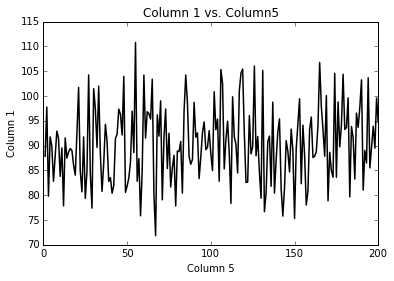

In [51]:
fig = plt.figure()

plt.plot(plot_df.col5, plot_df.col1, 'k-', linewidth = 1.5)
plt.title('Column 1 vs. Column5')
plt.xlabel('Column 5')
plt.ylabel('Column 1')

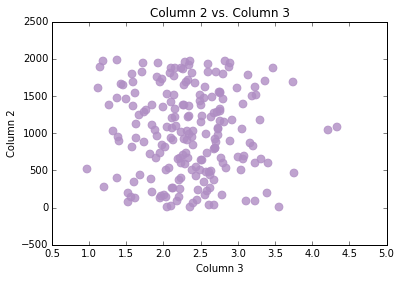

In [52]:
fig = plt.figure()

plt.scatter(plot_df.col2, plot_df.col3, color = '#af8dc3', alpha = 0.8, s = 60)
plt.title('Column 2 vs. Column 3')
plt.xlabel('Column 3')
plt.ylabel('Column 2')

So what did we do? We specified the x and y values we wanted plotted, specified colors and line styles, and some additional things, such as transparencies and labels. Let's take it a step further and specify things like legends on a plot with multiple traces.

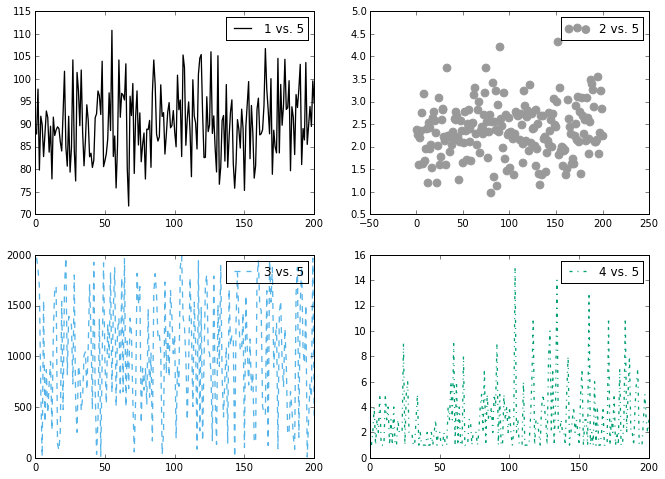

In [53]:
fig = plt.figure(figsize = (11, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(plot_df.col5, plot_df.col1, color = '#000000', linestyle = '-', label = '1 vs. 5', linewidth = 1.3)
ax1.legend(loc = 'best')

ax2.scatter(plot_df.col5, plot_df.col2, color = '#999999', label = '2 vs. 5', s = 60)
ax2.legend(loc = 'best')

ax3.plot(plot_df.col5, plot_df.col3, color = '#56B4E9', linestyle = '--', label = '3 vs. 5', linewidth = 1.3)
ax3.legend(loc = 'best')

ax4.plot(plot_df.col5, plot_df.col4, color = '#009E73', linestyle = '-.', label = '4 vs. 5', linewidth = 1.3)
ax4.legend(loc = 'best')


So in the above, we plotted columns against one another, specified color as a hex string, ad created labels and legends. For multivariate data such as this, you can also make a pairs plot (see the `Seaborn` documentation); due to time this will not be covered but examine the documentation or ask.

We call also call the `DataFrame` directly:

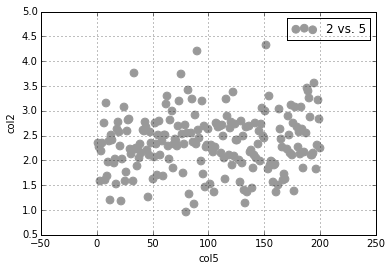

In [54]:
plot_df.plot(kind = 'scatter', x = 'col5', y = 'col2', color = '#999999', label = '2 vs. 5', s = 60)

##Basic grouping and distributions
- visualizing distributions with histograms  
- visualizing distributions with kernel density estimates  
- discretizing continous distributions 

Next, let's look at various counts and distributions. We will randomly assign labels in a new column; this will also be a good introduction to discretization and grouping.

In [55]:
np.random.seed(484390)

random_nums = np.random.rand(plot_df.shape[0])

# create categorical variables
high = random_nums > 0.85
middling = (random_nums <= 0.85) & (random_nums > 0.5)
just_ugh = random_nums <= 0.5

# assign values to rows and columns
plot_df['Category'] = pd.Series()
plot_df.loc[high, 'Category'] = 'high'
plot_df.loc[middling, 'Category'] = 'middling'
plot_df.loc[just_ugh, 'Category'] = 'terrible'
plot_df.set_index(plot_df.Category, inplace = True, drop = False)
plot_df.head()

,col1,col2,col3,col4,col5,Category
Category,,,,,,
middling,87.851031,2.358712,1971.625414,1,1,middling
terrible,97.760880,2.268473,1859.858562,2,2,terrible
terrible,79.814200,1.587728,1688.621442,4,3,terrible
middling,91.753634,2.199195,657.879397,1,4,middling
middling,89.893945,2.351636,10.950778,3,5,middling


In [56]:
plot_df.Category.describe()

count          200
unique           3
top       terrible
freq            97
Name: Category, dtype: object

Let's first look at how our data are distributed:

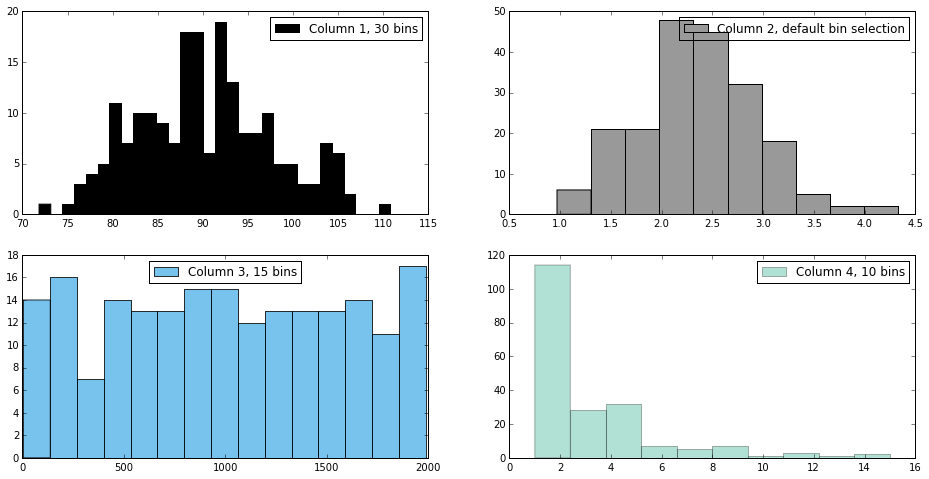

In [57]:
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(plot_df.col1, color = '#000000', label = 'Column 1, 30 bins', bins = 30)
ax1.legend(loc = 'best')

ax2.hist(plot_df.col2, color = '#999999', label = 'Column 2, default bin selection')
ax2.legend(loc = 'best')

ax3.hist(plot_df.col3, color = '#56B4E9', label = 'Column 3, 15 bins', bins = 15, alpha = 0.8)
ax3.legend(loc = 'best')

ax4.hist(plot_df.col4, color = '#009E73', label = 'Column 4, 10 bins', bins = 10, alpha = 0.3)
ax4.legend(loc = 'best')

Yours truly does not like using histograms since bin selection can give the wrong impression (there are rules of thumb, however). Let's try kernel density estimates instead.

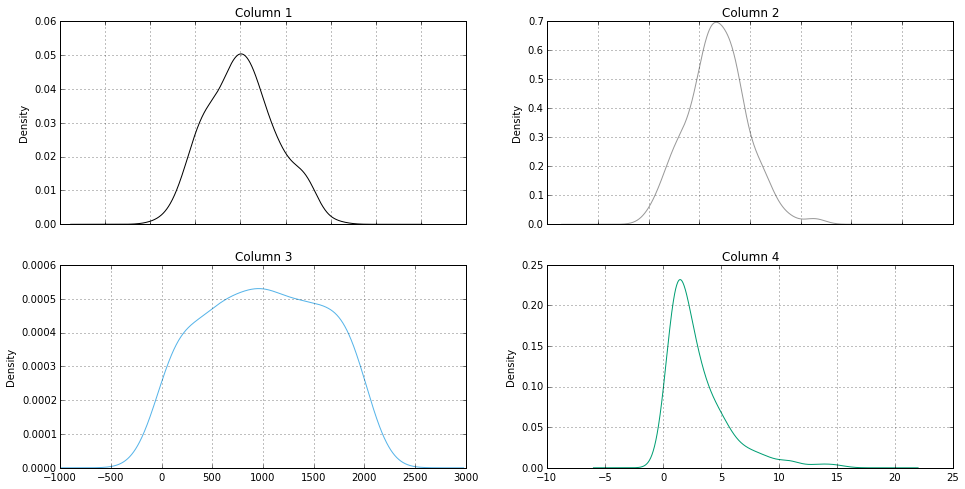

In [58]:
fig = plt.figure(figsize = (16, 8))

plt.subplot2grid((2, 2), (0, 0))
plot_df.col1.plot(kind = 'kde', color = '#000000')
plt.title('Column 1')

plt.subplot2grid((2, 2), (0, 1))
plot_df.col2.plot(kind = 'kde', color = '#999999')
plt.title('Column 2')

plt.subplot2grid((2, 2), (1, 0))
plot_df.col3.plot(kind = 'kde', color = '#56B4E9')
plt.title('Column 3')

plt.subplot2grid((2, 2), (1, 1))
plot_df.col4.plot(kind = 'kde', color = '#009E73')
plt.title('Column 4')

Let's now look at binning the columns:

In [59]:
col3_bins = np.arange(start = 0, stop = 2220, step = 440)
col3_labels = ['one', 'two', 'three', 'four', 'five']
plot_df['col3_cut'] = \
  pd.cut(plot_df.loc[:, 'col3'], right = True, include_lowest = True, \
         bins = col3_bins, labels = np.array(col3_labels))

plot_df.head()

,col1,col2,col3,col4,col5,Category,col3_cut
Category,,,,,,,
middling,87.851031,2.358712,1971.625414,1,1,middling,five
terrible,97.760880,2.268473,1859.858562,2,2,terrible,five
terrible,79.814200,1.587728,1688.621442,4,3,terrible,four
middling,91.753634,2.199195,657.879397,1,4,middling,two
middling,89.893945,2.351636,10.950778,3,5,middling,one


Now let's group by our new binned column and `Category`; we want to see size in each bucket.

In [60]:
plot_df_grouping = plot_df.groupby(['col3_cut', 'Category']).size().unstack(0)
plot_df_grouping

col3_cut,five,four,one,three,two
Category,,,,,
high,5,5,4,14,12
middling,6,15,15,12,15
terrible,15,23,20,21,18


And now, let's plot this:

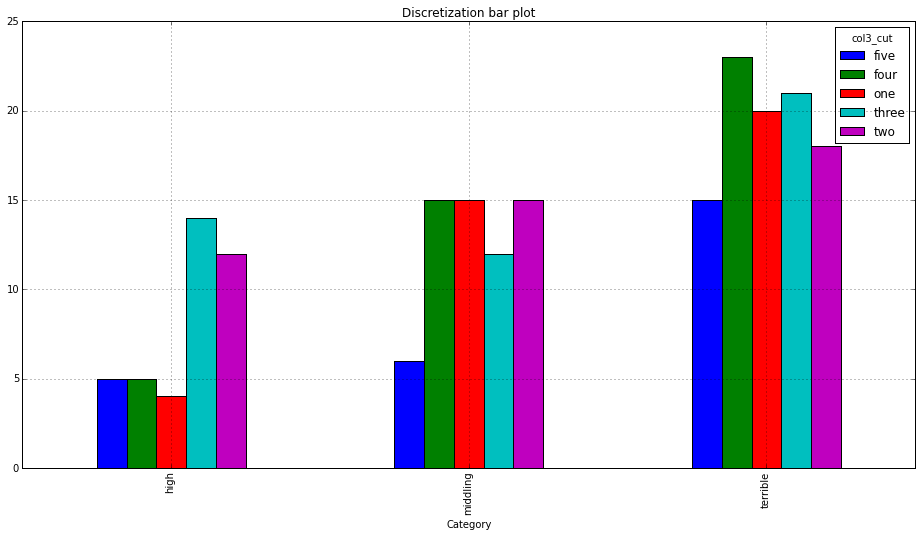

In [61]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 8)
fig = plt.figure()
plot_df_grouping.plot(kind = 'bar', stacked = False, title = 'Discretization bar plot')

## Meta-example: 2012 FEC Presidential Election donation data
- need some of Hour 2 info to make some summaries  
- very large: 5,349,937 rows and 18 columns  
- try to merge with various Census datasets  
- try to produce plots and descriptions like those demonstrated 

Suggested steps towards maximizing information (some will be redundant):
- import FEC data  
- import 2010 US Census data  
- map values such as candidate parties, geographic regions, state names, electoral college votes  
- index data by state  
- create `dict`s to map demographic information  
- convert dates  
- reduce to final two candidates  
- separate donations and expenditures
- summarize amounts  
- write to a delimited file of your choice

##Reading in chunks
- create an iterator when opening file  
- create an empty `DataFrame`  
- iterate over the chunks

In [62]:
fec_data_head = pd.read_csv('/Users/julian/Documents/R_info/P00000001-ALL.csv', index_col = False, nrows = 10)
fec_data_cols = fec_data_head.columns.values.tolist()

fec_chunker = pd.read_csv('/Users/julian/Documents/R_info/P00000001-ALL.csv', index_col = False, 
                          low_memory = False, chunksize = 100000)

fec_data = pd.DataFrame()

for piece in fec_chunker:
    fec_data = fec_data.append(piece)
fec_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00410118,P20002978,"Bachmann, Michele","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,A1FDABC23D2D545A1B83,P2012
1,C00410118,P20002978,"Bachmann, Michele","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,A899B9B0E223743EFA63,P2012
2,C00410118,P20002978,"Bachmann, Michele","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,A4B144E3CB3294ABC9D6,P2012
3,C00410118,P20002978,"Bachmann, Michele","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,A8C7C6F55B0914C5A880,P2012
4,C00410118,P20002978,"Bachmann, Michele","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,A070D6D560BD84AA98AC,P2012


In [63]:
fec_data.shape

(5349937, 18)

##Merging with other datasets
- `pd.merge`: merge on indices or columns  
- performs database-style merges  
  
    
left: match rows from right to left (i.e., keys in left)  
right: match rows from left to right (i.e., keys in right)  
inner: keep rows in both  
outer: keep all values for all rows, i.e., intersection of keys

In [64]:
df1 = pd.DataFrame({'x1': ['alpha', 'beta', 'gamma', 'delta'], 'x2': [1, 2, 3, 4]})
df2 = pd.DataFrame({'x3': [False, False, True, False], 'x1': ['alpha', 'beta', 'omicron', 'gamma']})

In [65]:
df1

,x1,x2
0,alpha,1
1,beta,2
2,gamma,3
3,delta,4


In [66]:
df2

,x1,x3
0,alpha,False
1,beta,False
2,omicron,True
3,gamma,False


In [67]:
pd.merge(df1, df2, how = 'left')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False
3,delta,4,NaN


In [68]:
pd.merge(df1, df2, how = 'right')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False
3,omicron,NaN,True


In [69]:
pd.merge(df1, df2, how = 'inner')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False


In [70]:
pd.merge(df1, df2, how = 'outer')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False
3,delta,4,NaN
4,omicron,NaN,True


In [71]:
pd.merge(df1, df2, on = 'x1')

,x1,x2,x3
0,alpha,1,False
1,beta,2,False
2,gamma,3,False


## Converting dates and times
-  se `pd.datetime` method on the desired column  
- specify the date format

In [72]:
date1 = '01-Jun-11'
print(date1)
print 'Time converted to ISO format: ', pd.to_datetime(date1, format = '%d-%b-%y')

01-Jun-11
Time converted to ISO format:  2011-06-01 00:00:00


##Exporting to text
- form:  `DataFrame.to_format`    
- e.g., `fec_data_summarized.to_csv(path/to/file/destination.csv)`
  
  
- R-style `data.frame`:  
`fec_net_money_state = fec_final.groupby(state_data_columns, as_index = False)[['contb_receipt_amt']].sum()`  
and then export as normal.

#Assignment
Possible pipeline:  
- import 2012 FEC Presidential data  
- append/map the popular vote totals  
- append/map the following census data:  
    - state population data  
    - elderly population data  
    - family/househould structure data  
- append/map parties of the major two candidates  
- append/map geographic regions (as seen above)  
- append/map full state names  
- append/map Electoral College votes for each state  

For a final summary, try the following:  
- restrict to 50 state + DC (hint: create a `dict` where the state abbreviations are the keys and use the `isin` function to restrict the data)  
- restrict the data to the final two candidates  
- have three separate datasets: all data, donations, expenditures  


- final CSV file should be about **2 GB**.

##References

McKinney, Wes. *Python for Data Analysis*. Should be able to access through Penn Libraries.  
Markham, Justin. [Introduction to Linear Regression](http://nbviewer.ipython.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb). Used as an example to create categorical values for a variable.

In [73]:
import IPython
import sys

In [74]:
print 'Python version: ', sys.version
print 'Platform: ', sys.platform
print 'IPython version: ', IPython.__version__
print 'NumPy version: ', np.__version__
print 'Pandas version: ', pd.__version__

Python version:  2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Platform:  darwin
IPython version:  3.1.0
NumPy version:  1.9.2
Pandas version:  0.15.2
